PERMUTATION TEST

In [5]:
import numpy as np
import main_urnings as mu
import matplotlib.pyplot as plt
import utilities as util

#game settings
n_player = 20
n_items = 1000
starting_score = 2
player_urn_sizes = 4
item_urn_sizes = 100
n_sim = 200

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)


#creating players and items
players = []
for i in range(n_player):
    pname = "student" + str(i)
    player = mu.Player(user_id = pname, score = starting_score, urn_size = player_urn_sizes, true_value = 0.2, so_urn_size=15)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)
    starting_score = np.random.binomial(item_urn_sizes, item_true_values[i])
    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=True, adaptive_urn=True, adaptive_urn_type="second_order_urnings", window=10, min_urn=8, max_urn=64, permutation_test=True, perm_p_val=0.2)
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)
adaptive_sim.play(n_games=1, test = True)
for sim in range(n_sim):
    for pl in players:
        pl.true_value += 0.0035
    adaptive_sim.play(n_games=1, test = True)





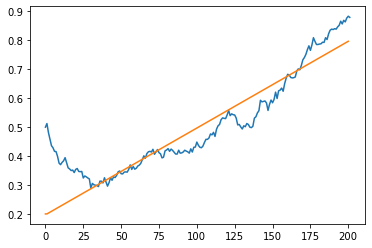

In [6]:
urnings_matrix = np.zeros((n_player, len(players[0].estimate_container)))
for pl in range(n_player):
    row = players[pl].estimate_container
    urnings_matrix[pl,:] = row

col_means = np.mean(urnings_matrix, axis = 0)
plt.plot(col_means)

true_vals = [0.2]
for sim in range(n_sim):
    true_vals.append(0.2 + 0.003 * sim)
plt.plot(true_vals)

/var/folders/80/5fffg6dx3rb7q3ffwrzchg7c0000gn/T/ipykernel_17928/368668695.py:15: RuntimeWarning: invalid value encountered in long_scalars
  p_value = 1 - np.sum(permute_means < np.abs(np.mean(sample)))/len(permute_means)


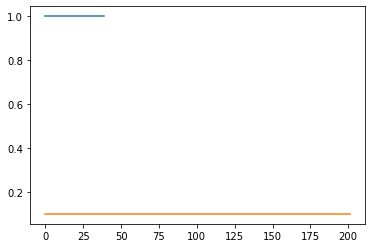

In [7]:
window = 40
p_values = []
all_comb = util

for i in range(len(players[0].differential_container)):
    permute_means = []
    if i >= window:
        sample = players[0].differential_container[i-window:i]
        
        n_permutations = 1000


        permute_means = np.array(permute_means)

        p_value = 1 - np.sum(permute_means < np.abs(np.mean(sample)))/len(permute_means)
        p_values.append(p_value)
    else:
        permute_means.append(1)
        p_values.append(1)

plt.plot(p_values)
plt.plot(np.repeat(0.1, len(p_values)))

0

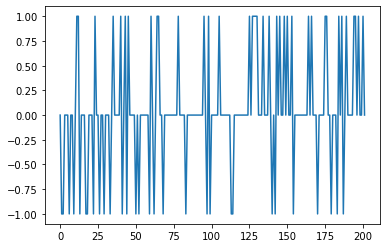

In [110]:
plt.plot(player.differential_container)
len([i for i in p_values if i < 0.1])

MOVING AVERAGE

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.53851648  0.53851648
  0.45825757  0.45825757  0.45825757  0.45825757  0.45825757  0.45825757
  0.45825757  0.45825757  0.53851648  1.00498756  1.18743421  1.34164079
  1.56204994  1.66132477  1.66132477  1.67630546  1.53622915  1.18743421
  0.83066239  2.16564078  2.72213152  2.97489496  3.01496269  3.02654919
  2.87228132  2.78567766  2.50798724  1.95959179  0.64031242  4.1484937
  5.48543526  6.40624695  6.92892488  7.13372273  7.07389567  6.74981481
  5.99666574  4.60868745  1.18321596  0.9797959   0.67082039  0.48989795
  0.67082039  0.8         0.78102497  0.74833148  0.7         0.63245553
  0.6         0.64031242  0.5         0.48989795  0.48989795  0.48989795
  0.6         0.63245553  0.6         0.48989795  0.5         0.48989795
  0.45825757  0.4         0.4         0.64031242  0.80622577  0.9
  0.87177979  0.87177979  0.87177979  0.83066239  0.83066239  0.774

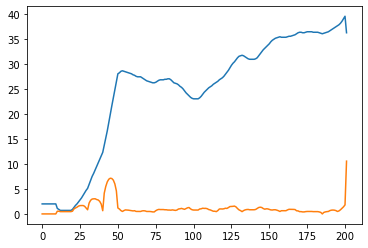

In [133]:
window = 10
moving_avg = []
moving_std = []
for i in range(len(player.container)):
    if i >= window:
        sample = player.container[i-10:i]
        moving_avg.append(np.mean(sample))
        moving_std.append(np.std(sample))
    else:
        moving_avg.append(player.container[0])
        moving_std.append(0)
x = np.array(moving_avg) 
sd = np.array(moving_std)

plt.plot(x)
plt.plot(sd)

print(sd)

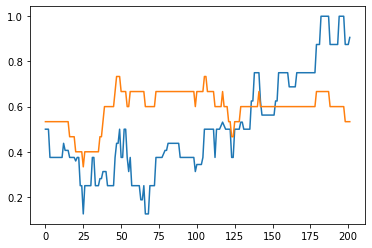

In [8]:
plt.plot(player.estimate_container)
plt.plot(player.so_container)


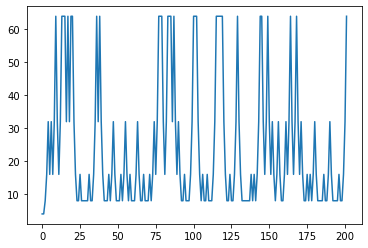

In [9]:
plt.plot(player.urn_container)
#plt.plot(player.differential_container)

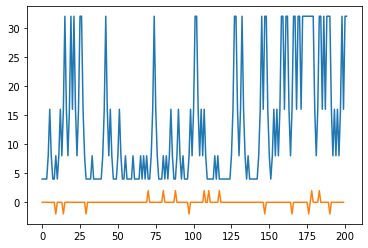

In [25]:
player.so_container
so_urn_size = 20

diff_so = []

for i in range(1, len(player.so_container)):
    diff_so.append(np.round(player.so_container[i] * so_urn_size - player.so_container[i-1] * so_urn_size))


min_urn = 4
max_urn = 32
urn_cont = []
urn_cont.append(min_urn)

for i in player.so_container:
    draw = np.sum(np.random.binomial(1,i,2))
    if draw != 1 and urn_cont[-1] > min_urn :
        urn_cont.append(urn_cont[-1] / 2)
    elif draw == 1 and urn_cont[-1] < max_urn:
        urn_cont.append(urn_cont[-1] * 2)
    else:
        urn_cont.append(urn_cont[-1])



urn_cont1 = []
urn_cont1.append(min_urn)
for j in diff_so:
    if int(np.abs(j)) == 1 and urn_cont1[-1] > min_urn:
        urn_cont1.append(urn_cont1[-1] / 2)
    elif j == 0 and urn_cont[-1] < max_urn:
        urn_cont1.append(urn_cont1[-1] * 2)
    else:
        urn_cont1.append(urn_cont1[-1])


plt.plot(urn_cont)
plt.plot(diff_so)


    